In [3]:
import acquire
import prepare

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Exploring Store Data:

## Acquiring Data:

In [5]:
sales = prepare.prepare_store_data()

In [15]:
sales.head()

,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,sale_amount,sale_id,store_id,store_address,store_city,store_state,store_zipcode,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,January,Tuesday,10.92
2013-01-01,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,26.0,211817,7,12018 Perrin Beitel Rd,San Antonio,TX,78217,January,Tuesday,218.40
2013-01-01,Mama Marys,46,Pizza Sauce,4.65,35457770664,35457770664,27.0,832657,7,12018 Perrin Beitel Rd,San Antonio,TX,78217,January,Tuesday,125.55
2013-01-01,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,54.0,213643,8,15000 San Pedro Ave,San Antonio,TX,78232,January,Tuesday,453.60
2013-01-01,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,35.0,215469,9,735 SW Military Dr,San Antonio,TX,78221,January,Tuesday,294.00


## Splitting Data:

In [17]:
sales.index.min()

Timestamp('2013-01-01 00:00:00')

In [18]:
sales.index.max()

Timestamp('2017-12-31 00:00:00')

In [26]:
#splitting the data at 2017 to give the test set enough data:
train = sales[:'2016']
test = sales['2017':]

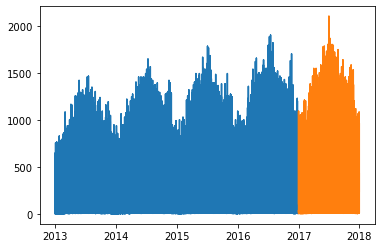

In [27]:
#Visualizing the split data:
plt.plot(train.index, train.sales_total)
plt.plot(test.index, test.sales_total)

## Visualizations:

In [30]:
# Setting y equal to the target variable:
y = train.sales_total
y.head()

sale_date
2013-01-01     10.92
2013-01-01    218.40
2013-01-01    125.55
2013-01-01    453.60
2013-01-01    294.00
Name: sales_total, dtype: float64

<AxesSubplot:ylabel='Frequency'>

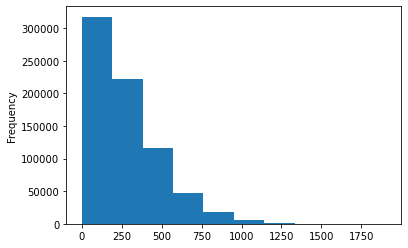

In [31]:
y.plot.hist()

#This shows that the vast majority of order fall under around $500.

[Text(0.5, 1.0, 'Average Sales Total by Month'),
 Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Mean Total Sales')]

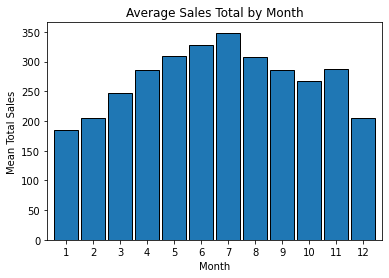

In [32]:
#Plotting the mean total sales by month:
ax = y.groupby(y.index.month).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Sales Total by Month', xlabel='Month', ylabel='Mean Total Sales')

[Text(0.5, 1.0, 'Average Total Sales by Weekday'),
 Text(0.5, 17.200000000000003, 'Weekday'),
 Text(17.200000000000003, 0.5, 'Total Sales')]

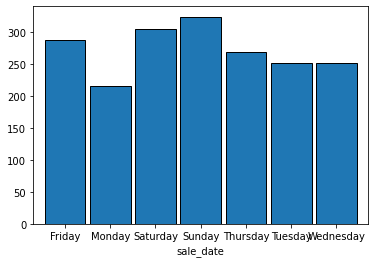

In [33]:
#Plotting mean total sales by weekday:

y.groupby(y.index.day_name()).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Total Sales by Weekday', xlabel='Weekday', ylabel='Total Sales')

<AxesSubplot:xlabel='month', ylabel='sales_total'>

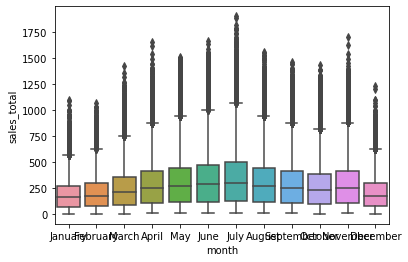

In [45]:
#Plotting sales_total by month:
sns.boxplot(data = train, x = 'month', y = 'sales_total')

# It appears that the summer months tend to have higher average total sales. 

<AxesSubplot:xlabel='day_of_week', ylabel='sales_total'>

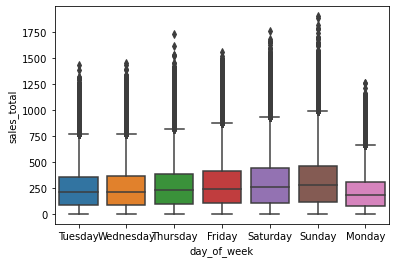

In [44]:
# Plotting sales_total by day of the week:
sns.boxplot(data = train, x = 'day_of_week', y = 'sales_total')

#It appears that weekends tend to have higher average total sales.

<AxesSubplot:xlabel='sale_date'>

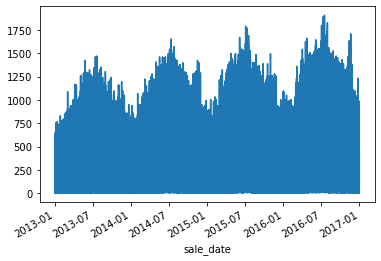

In [46]:
#Visualizing sales_total over time:
y.plot()

#There is seasonality to total sales, but it does appear that there is an overall upward trend as well.

<AxesSubplot:title={'center':'1 week average'}, xlabel='sale_date'>

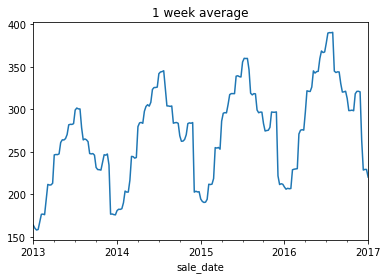

In [53]:
# Visualizing changes over 1 week averages:
y.resample('1W').mean().plot(title='1 week average')

<AxesSubplot:title={'center':'1 Month average'}, xlabel='sale_date'>

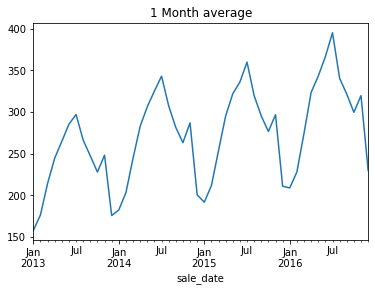

In [52]:
#Visualizing Changes over 1 month averages:
y.resample('1M').mean().plot(title='1 Month average')

<AxesSubplot:title={'center':'1 Year Average'}, xlabel='sale_date'>

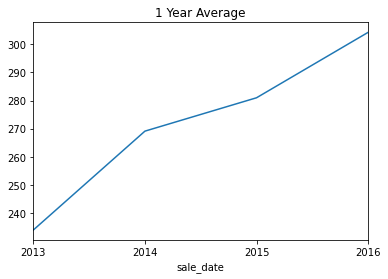

In [51]:
y.resample('1Y').mean().plot(title='1 Year Average')

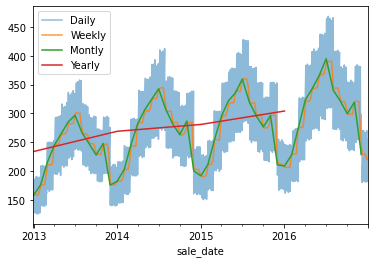

In [56]:
#Combining all of the above plots to compare:
y.resample('D').mean().plot(alpha=.5, label='Daily')
y.resample('W').mean().plot(alpha=.8, label='Weekly')
y.resample('M').mean().plot(label='Montly')
y.resample('Y').mean().plot(label='Yearly')
plt.legend()

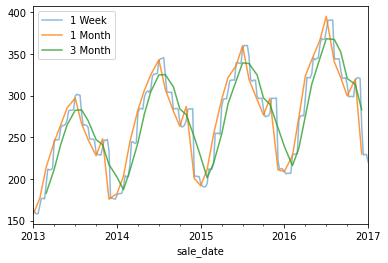

In [60]:
#Plotting rolling averages:
y.resample('W').mean().rolling(1).mean().plot(alpha=.5, label='1 Week')
y.resample('M').mean().rolling(1).mean().plot(alpha=.8, label='1 Month')
y.resample('M').mean().rolling(3).mean().plot(alpha=.8, label='3 Month')
plt.legend()

<AxesSubplot:title={'center':'Average week-to-week change in sales_total'}, xlabel='sale_date'>

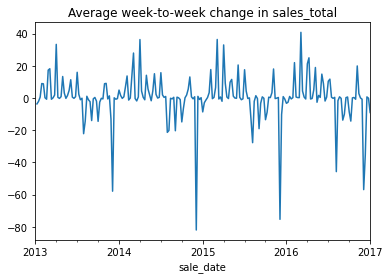

In [61]:
#Visualizing the difference in total sales from week to week:
y.resample('W').mean().diff().plot(title='Average week-to-week change in sales_total')

#This shows an uptick before, followed by a pretty major decrease in sales after the Christmas holidays
#Also shows a fairly sharp spike in sales in the summer months, likely around the 4th of July, followed by a decrease into the fall.

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

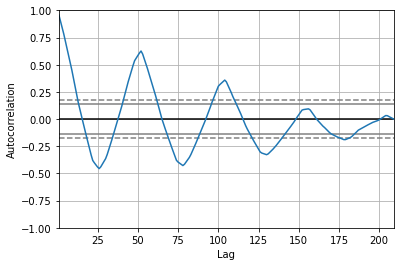

In [63]:
#Autocorrelation plot:
pd.plotting.autocorrelation_plot(train.sales_total.resample('W').mean())

In [64]:
#Seasonal Decomposition:

y = train.sales_total.resample('W').mean()

result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()

,y,trend,seasonal,resid
sale_date,,,,
2013-01-06,163.589167,NaN,-77.434789,NaN
2013-01-13,159.981203,NaN,-79.225757,NaN
2013-01-20,157.946720,NaN,-79.904284,NaN
2013-01-27,158.545383,NaN,-80.259357,NaN
2013-02-03,167.585014,NaN,-77.352692,NaN


<AxesSubplot:xlabel='sale_date'>

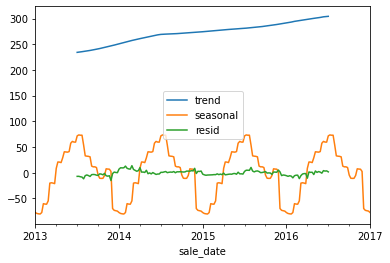

In [65]:
decomposition.iloc[:, 1:].plot()